In [11]:
#We the people...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import seaborn as sns

In [2]:
#File path
file_path=r'C:\Users\castl\Downloads\Data_Lionel\Data_Lionel\E142_data\HEPData-ins424108-v1-csv\Table5.csv' #insert your own

In [3]:
#Read the CSV file
with open(file_path, 'r') as file:
    lines=file.readlines()

In [4]:
#Find the start of the G1 data section
g1_start=None
for i, line in enumerate(lines):
    if 'G1,stat +,stat -,sys +,sys -' in line:
        g1_start=i
        break

if g1_start is None:
    raise ValueError("G1 data section not found in the file")

In [5]:
#Extract G1 data lines (skip the header line)
g1_data_lines=[]
for i in range(g1_start + 1, len(lines)):
    line=lines[i].strip()
    if line and not line.startswith('#') and ',' in line:
        g1_data_lines.append(line)
    elif line.startswith('#') or not line:
        #Skip empty lines
        continue
    else:
        #End of data section
        break

In [6]:
# Parse the G1 data
g1_data=[]
for line in g1_data_lines:
    parts=line.split(',')
    if len(parts)>=7:  
        try:
            x=float(parts[0])
            x_low=float(parts[1])
            x_high=float(parts[2])
            g1=float(parts[3])
            stat_plus=float(parts[4])
            stat_minus=float(parts[5])
            sys_plus=float(parts[6])
            sys_minus=float(parts[7])
            
            g1_data.append({
                'X': x,
                'X_LOW': x_low,
                'X_HIGH': x_high,
                'Q2': 2.0,  # Fixed Q2 value for Table5
                'G1': g1,
                'stat_plus': stat_plus,
                'stat_minus': stat_minus,
                'sys_plus': sys_plus,
                'sys_minus': sys_minus
            })
        except ValueError:
            continue

In [7]:
# Convert to DataFrame
df = pd.DataFrame(g1_data)

In [8]:
# Calculate x_avg as the average of X_LOW and X_HIGH
df['x_avg']=(df['X_LOW']+df['X_HIGH'])/2

print("Table 5 - Proton G1 Data (Q² = 2 GeV²):")
print(df[['X', 'x_avg', 'Q2', 'G1', 'stat_plus', 'stat_minus']])

Table 5 - Proton G1 Data (Q² = 2 GeV²):
       X  x_avg   Q2     G1  stat_plus  stat_minus
0  0.035  0.035  2.0 -0.311      0.207      -0.207
1  0.050  0.050  2.0 -0.195      0.090      -0.090
2  0.081  0.080  2.0 -0.154      0.044      -0.044
3  0.124  0.125  2.0 -0.142      0.031      -0.031
4  0.174  0.175  2.0 -0.099      0.026      -0.026
5  0.245  0.250  2.0 -0.042      0.018      -0.018
6  0.341  0.350  2.0  0.010      0.020      -0.020
7  0.466  0.500  2.0  0.000      0.020      -0.020



Summary Statistics:
Number of data points: 8
x range: 0.035 to 0.500
Q² value: 2.0 GeV²
G1 range: -0.311 to 0.010


<Figure size 1200x500 with 0 Axes>

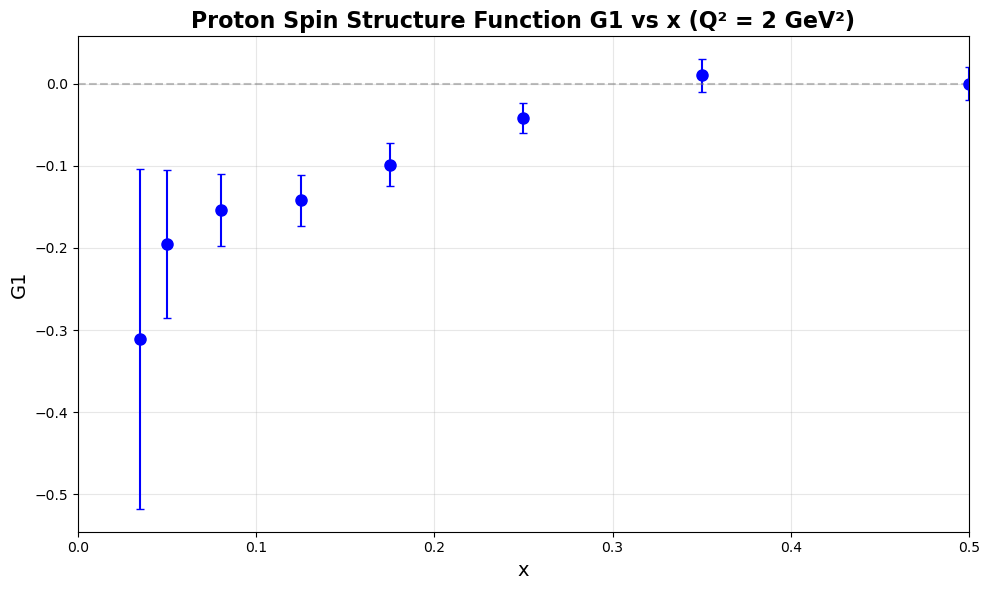

In [13]:
#Plotting/Summary
plt.style.use('default')
fig=plt.figure(figsize=(12, 5))

#Summary statistics
print("\nSummary Statistics:")
print(f"Number of data points: {len(df)}")
print(f"x range: {df['x_avg'].min():.3f} to {df['x_avg'].max():.3f}")
print(f"Q² value: {df['Q2'].iloc[0]:.1f} GeV²")
print(f"G1 range: {df['G1'].min():.3f} to {df['G1'].max():.3f}")

#Plot
fig2, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.errorbar(df['x_avg'], df['G1'], 
           yerr=[np.abs(df['stat_minus']), df['stat_plus']], 
           fmt='o', capsize=3, capthick=1, markersize=8, 
           color='blue', ecolor='blue', linewidth=0, elinewidth=1.5)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('G1', fontsize=14)
ax.set_title('Proton Spin Structure Function G1 vs x (Q² = 2 GeV²)', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 0.5)

#Horizontal line at y=0 for reference
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()